2024-11-20 11:03:31 - random_ideas.py:103 - INFO - 
Summary Statistics for 1-day hold period:
2024-11-20 11:03:31 - random_ideas.py:104 - INFO - Number of BUY operations analyzed: 61
2024-11-20 11:03:31 - random_ideas.py:105 - INFO - Average normalized daily return: -0.05%


2024-11-20 11:03:31 - random_ideas.py:106 - INFO - Median normalized daily return: -0.32%


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


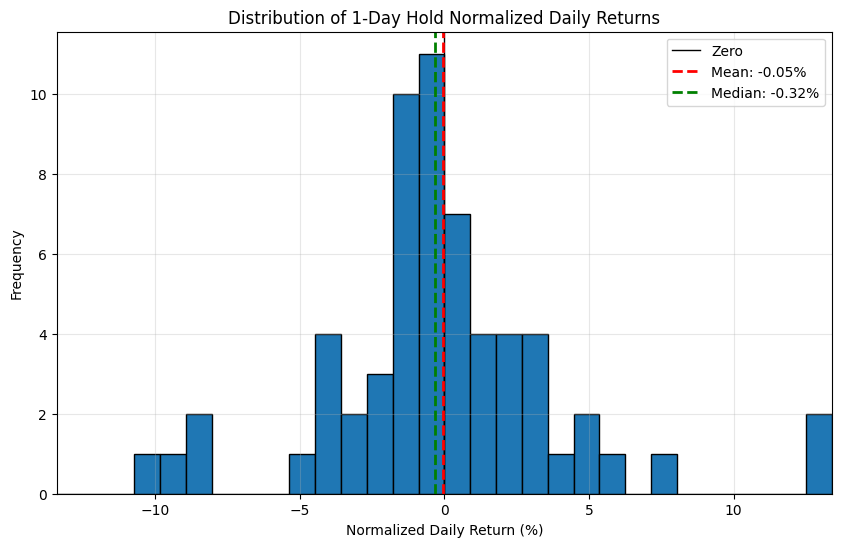

2024-11-20 11:03:32 - random_ideas.py:103 - INFO - 
Summary Statistics for 3-day hold period:
2024-11-20 11:03:32 - random_ideas.py:104 - INFO - Number of BUY operations analyzed: 61
2024-11-20 11:03:32 - random_ideas.py:105 - INFO - Average normalized daily return: -0.09%
2024-11-20 11:03:32 - random_ideas.py:106 - INFO - Median normalized daily return: -0.19%


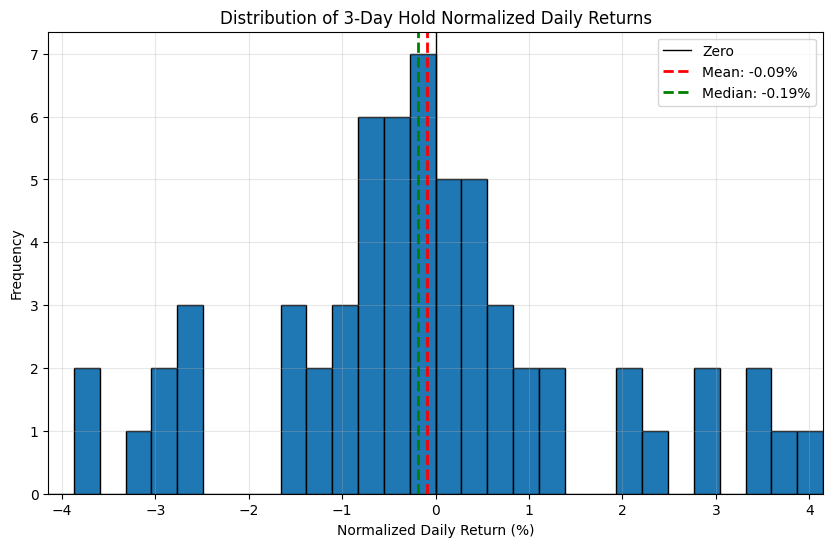

2024-11-20 11:03:32 - random_ideas.py:103 - INFO - 
Summary Statistics for 5-day hold period:
2024-11-20 11:03:32 - random_ideas.py:104 - INFO - Number of BUY operations analyzed: 61
2024-11-20 11:03:32 - random_ideas.py:105 - INFO - Average normalized daily return: -0.21%
2024-11-20 11:03:32 - random_ideas.py:106 - INFO - Median normalized daily return: -0.18%


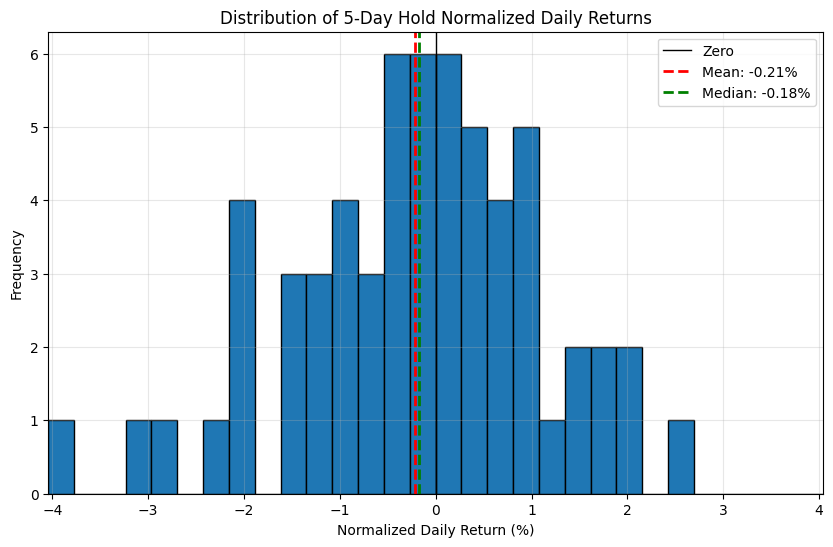

2024-11-20 11:03:32 - random_ideas.py:103 - INFO - 
Summary Statistics for 7-day hold period:
2024-11-20 11:03:32 - random_ideas.py:104 - INFO - Number of BUY operations analyzed: 61
2024-11-20 11:03:32 - random_ideas.py:105 - INFO - Average normalized daily return: -0.01%
2024-11-20 11:03:32 - random_ideas.py:106 - INFO - Median normalized daily return: 0.03%


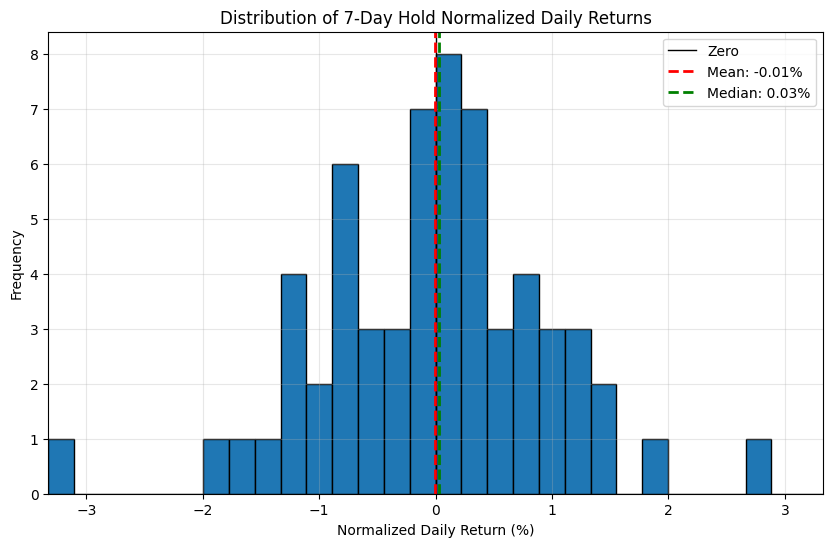

2024-11-20 11:03:32 - random_ideas.py:103 - INFO - 
Summary Statistics for 10-day hold period:
2024-11-20 11:03:32 - random_ideas.py:104 - INFO - Number of BUY operations analyzed: 61
2024-11-20 11:03:32 - random_ideas.py:105 - INFO - Average normalized daily return: 0.05%
2024-11-20 11:03:32 - random_ideas.py:106 - INFO - Median normalized daily return: 0.10%


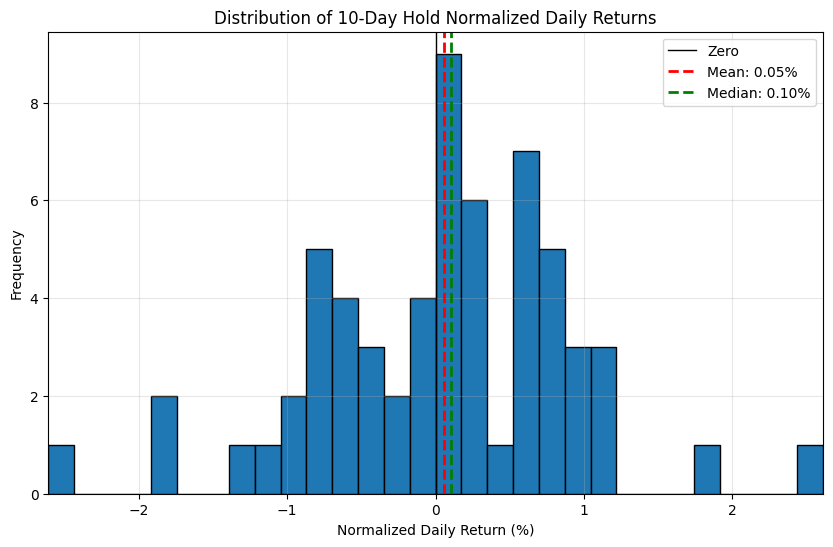

2024-11-20 11:03:33 - random_ideas.py:103 - INFO - 
Summary Statistics for 14-day hold period:
2024-11-20 11:03:33 - random_ideas.py:104 - INFO - Number of BUY operations analyzed: 61
2024-11-20 11:03:33 - random_ideas.py:105 - INFO - Average normalized daily return: 0.15%
2024-11-20 11:03:33 - random_ideas.py:106 - INFO - Median normalized daily return: 0.19%


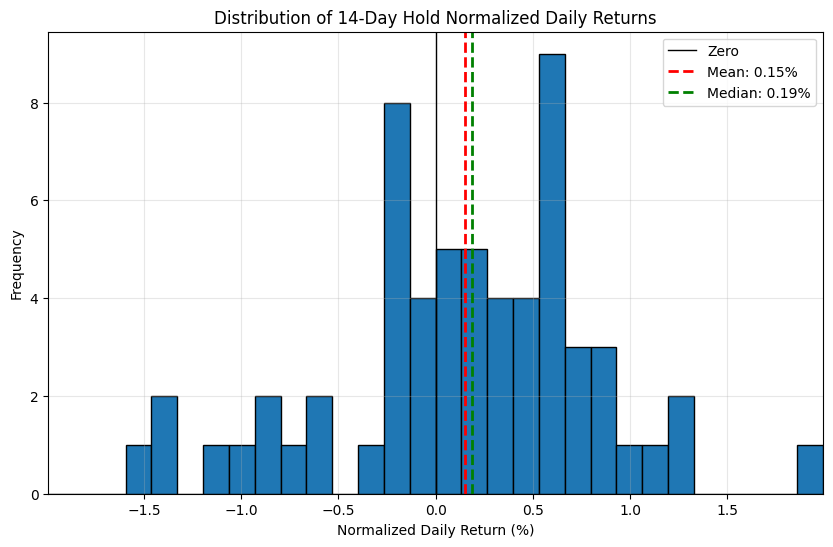

2024-11-20 11:03:33 - random_ideas.py:103 - INFO - 
Summary Statistics for 30-day hold period:
2024-11-20 11:03:33 - random_ideas.py:104 - INFO - Number of BUY operations analyzed: 61
2024-11-20 11:03:33 - random_ideas.py:105 - INFO - Average normalized daily return: 0.12%
2024-11-20 11:03:33 - random_ideas.py:106 - INFO - Median normalized daily return: 0.15%
2024-11-20 11:03:33 - random_ideas.py:112 - INFO - Operations using last available price: 1


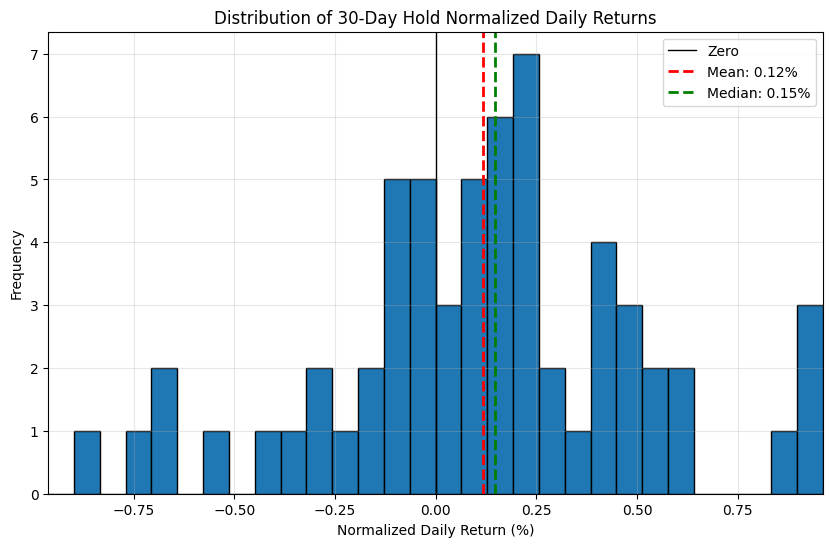

2024-11-20 11:03:33 - random_ideas.py:103 - INFO - 
Summary Statistics for 90-day hold period:
2024-11-20 11:03:33 - random_ideas.py:104 - INFO - Number of BUY operations analyzed: 61
2024-11-20 11:03:33 - random_ideas.py:105 - INFO - Average normalized daily return: 0.09%
2024-11-20 11:03:33 - random_ideas.py:106 - INFO - Median normalized daily return: 0.06%
2024-11-20 11:03:33 - random_ideas.py:112 - INFO - Operations using last available price: 5


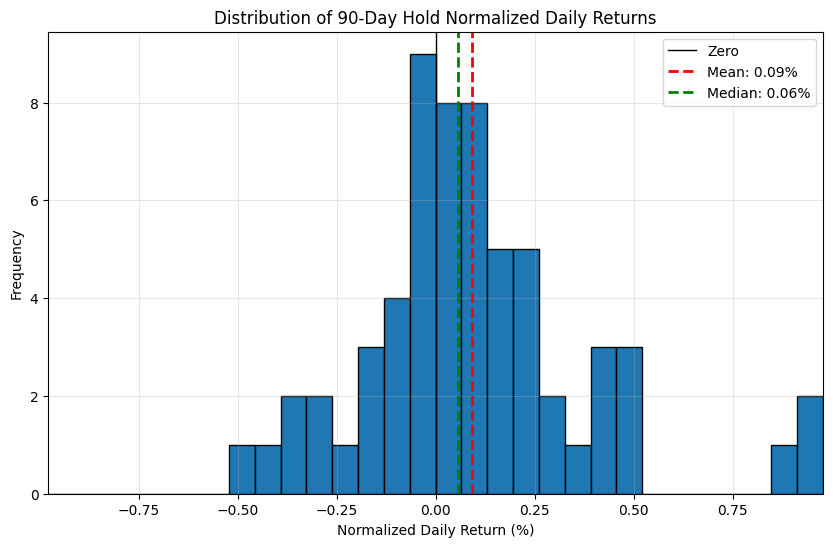


Returns by Holding Period:
 Days  Average Return  Median Return      MAE
    1       -0.046794      -0.315331 2.807913
    3       -0.088199      -0.186860 1.243492
    5       -0.214149      -0.178657 1.011972
    7       -0.008322       0.031878 0.737889
   10        0.054687       0.102662 0.651603
   14        0.150238       0.186815 0.525910
   30        0.118044       0.147673 0.293924
   90        0.092862       0.056744 0.209290


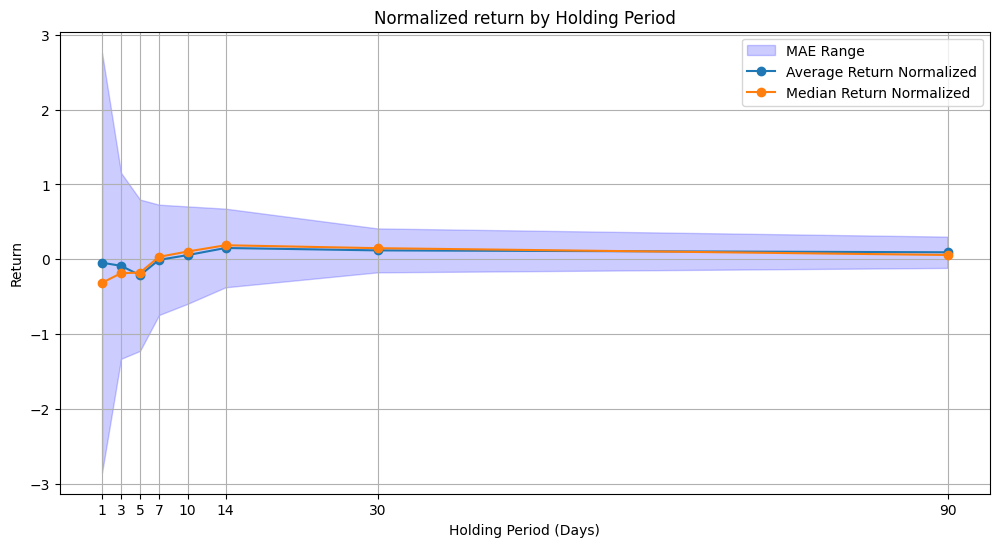

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, median
from random_ideas import hold_days_after_buy

%load_ext autoreload
%autoreload 2

# Define holding periods to test
holding_days = [1, 3, 5, 7, 10, 14, 30, 90]



# Calculate returns for each holding period
results = []
for days in holding_days:
    df = hold_days_after_buy('../ap_ops.csv', days)
    returns = df['normalized_return'].tolist()
    mae = np.mean(np.abs(mean(returns) - df['normalized_return']))
    results.append({
        'Days': days,
        'Average Return': mean(returns),
        'Median Return': median(returns),
        'MAE': mae
    })


# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nReturns by Holding Period:")
print(results_df.to_string(index=False))

# Plot results
plt.figure(figsize=(12, 6))

plt.fill_between(holding_days, 
                results_df['Average Return'] - results_df['MAE'], 
                results_df['Average Return'] + results_df['MAE'],
                alpha=0.2, 
                color='blue', 
                label='MAE Range')
plt.plot(results_df['Days'], results_df['Average Return'], label='Average Return Normalized', marker='o')
plt.plot(results_df['Days'], results_df['Median Return'], label='Median Return Normalized', marker='o')
plt.xlabel('Holding Period (Days)')
plt.ylabel('Return')
plt.title('Normalized return by Holding Period')
plt.legend()
plt.grid(True)
plt.xticks(list(holding_days))
plt.show()
